In [ ]:
import pandas as pd
import os
import time
import patoolib
import gzip
import shutil
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
patoolib.extract_archive(r"L:\Raw_1_sec_Bar_Data\FX\EURUSD\Pickle\EURUSD.pkl.gz", 
                         outdir=r"L:\Raw_1_sec_Bar_Data\FX\EURUSD\Pickle\\")

In [ ]:
df = pd.read_pickle(r"L:\Raw_1_sec_Bar_Data\FX\EURUSD\Pickle\EURUSD.pkl")

### Resampling into 1 Minute bars

In [ ]:
min_1_low = df.loc[:,"Low"].resample("T").apply(np.min)
min_1_high = df.loc[:,"High"].resample("T").apply(np.max)
min_1_open = df.loc[:,"Open"].resample("T").first()
min_1_close = df.loc[:,"Close"].resample("T").last()
min_1_Trading_date_Actual_Time = df.loc[:,"Trading_date_Actual_Time"].resample("T").first()
min_1_Trading_date_Sequential_Time = df.loc[:,"Trading_date_Sequential_Time"].resample("T").first()

min_1_df = pd.DataFrame.from_dict({"Open":min_1_open,"High":min_1_high,"Low":min_1_low,"Close":min_1_close,
                                        "Trading_date_Actual_Time":min_1_Trading_date_Actual_Time,
                                        "Trading_date_Sequential_Time":min_1_Trading_date_Sequential_Time})

min_1_df.head()

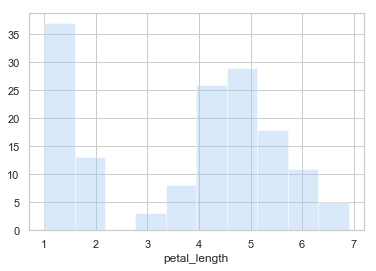

In [64]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Load the example tips dataset
tips = sns.load_dataset("tips")
flow = sns.load_dataset('iris')
sns.distplot(flow['petal_length'], bins=10, kde = False)
# plt.show()
# # Draw a nested violinplot and split the violins for easier comparison
# sns.violinplot(x="day", y="total_bill",
#                split=True, inner="quartile",
#                data=tips)
# sns.despine(left=True)